| [03_data_science/09_Scikit-Learn分类.ipynb](https://github.com/shibing624/python-tutorial/blob/master/03_data_science/09_Scikit-Learn分类.ipynb)  | Scikit-Learn数据分类  |[Open In Colab](https://colab.research.google.com/github/shibing624/python-tutorial/blob/master/03_data_science/09_Scikit-Learn分类.ipynb) |

# Scikit-Learn的应用
机器学习库，机器学习分为监督学习和非监督学习：
![ml](../docs/imgs/ml_taxonomy.png)

## 分类
先学习下监督学习中的分类任务：


加载数据集：

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
print(digits.target)
digits.images[0]

[0 1 2 ... 8 9 8]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

显示图片：

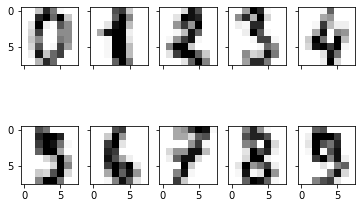

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True)
 
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(digits.data[i].reshape((8, 8)), cmap='Greys', interpolation='nearest')
plt.show()

## 模型训练和预测

### SVM


In [5]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C=100)

clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [6]:
clf.predict(digits.data[:2])

array([0, 1])

In [7]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC()

In [8]:
clf.predict(X[:150])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

使用pickle序列化模型：

In [10]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
predict_y = clf2.predict(X[:150])
predict_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

使用joblib保存：

In [11]:
import joblib
joblib.dump(clf, 'clf.pkl')

['clf.pkl']

In [12]:
clf = joblib.load('clf.pkl')
clf

SVC()

In [13]:
import os
os.remove('clf.pkl')

### 随机映射 random projection
sklearn.random_projection 模块实现了一种简单和计算高效的方法，通过交易控制量的精度（作为附加方差），以缩短数据的维数，从而缩短处理时间和缩小模型大小。 

该模块实现两种类型的非结构化随机矩阵：高斯随机矩阵 GaussianRandomProjection 和稀疏随机矩阵 SparseRandomProjection。

- 高斯随机矩阵：通过将原始输入空间投影在随机生成的矩阵上来降低维度。
- 稀疏随机矩阵：相比于高斯随机映射，稀疏随机映射会更能保证降维的质量，并带来内存的使用效率和运算效率。

In [14]:
import numpy as np
from sklearn import random_projection
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X

array([[0.5488135 , 0.71518934, 0.60276335, ..., 0.4801078 , 0.64386404,
        0.5017731 ],
       [0.8115185 , 0.476084  , 0.523156  , ..., 0.83000296, 0.9328062 ,
        0.30833843],
       [0.29264206, 0.56651825, 0.13741443, ..., 0.6965229 , 0.4836966 ,
        0.33955073],
       ...,
       [0.32059506, 0.24986687, 0.03107279, ..., 0.3893891 , 0.93272   ,
        0.33276632],
       [0.39553738, 0.8440175 , 0.15044175, ..., 0.53561085, 0.35458204,
        0.935781  ],
       [0.81402713, 0.85133713, 0.43113658, ..., 0.44645575, 0.3601266 ,
        0.6258866 ]], dtype=float32)

In [15]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)

print(X_new.dtype)

float64


### LR
使用逻辑回归（Logistic Regression, LR）模型：

LR模型的详细介绍参考sklearn官方文档：[LR](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
)

In [16]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
clf = LogisticRegression(solver='lbfgs', fit_intercept=False)
clf.fit(iris.data, iris.target)

LogisticRegression(fit_intercept=False)

In [17]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [18]:
y[:3]

array([0, 0, 0])

如果模型的label为文本：

In [19]:
clf.fit(iris.data, iris.target_names[iris.target])

LogisticRegression(fit_intercept=False)

In [20]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

### set_params
设置模型参数

In [21]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [22]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [23]:
clf.set_params(kernel='rbf').fit(X, y)
clf.predict(X_test)

array([0, 0, 0, 1, 0])

## 多分类 vs. 多标签模型

多分类模型：

In [24]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]
classify = OneVsRestClassifier(estimator=SVC(random_state=0))
model = classify.fit(X, y)
model

OneVsRestClassifier(estimator=SVC(random_state=0))

In [25]:
model.predict(X)

array([0, 0, 1, 1, 2])

In [26]:
y = LabelBinarizer().fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [27]:
classify.fit(X, y).predict(X) 

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [28]:
classify.fit(X, y).score(X, y)
# 0.6 

0.6

多标签模型：

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y

[[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]

In [30]:
y = MultiLabelBinarizer().fit_transform(y)
y

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

In [31]:
classify = OneVsRestClassifier(estimator=SVC(random_state=0))
model = classify.fit(X, y)
model

OneVsRestClassifier(estimator=SVC(random_state=0))

In [32]:
model.predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [33]:
model.score(X, y)

0.6


## 预测错误结果可视化


 `cross_val_predict` 


In [34]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr = LinearRegression()
boston = datasets.load_boston()
y = boston.target

boston.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [35]:
predicted = cross_val_predict(lr, boston.data, y, cv=10)
predicted[:3]

array([30.04900564, 24.73268691, 30.36234996])

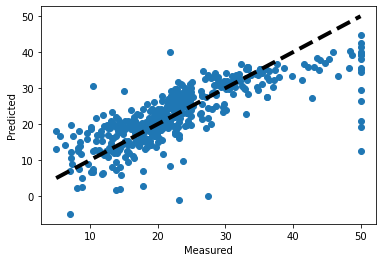

In [36]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

本节完。